In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ipynb.fs.full.Final_functions import *

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, KFold, RepeatedStratifiedKFold, StratifiedKFold

from collections import Counter

#Models
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from numpy import mean
from sklearn.model_selection import cross_val_score

#Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix

#Oversampling
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
import statistics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = GenerateDataset(Minority_Samples,Majority_Samples,Separation,Overlap,MajorCovFlat,MinorCovInclined)

In [3]:
print(Separation,Overlap,MajorCov1,MinorCov1)

10 50 [[8, 0], [0, 8]] [[10, 0], [0, 10]]


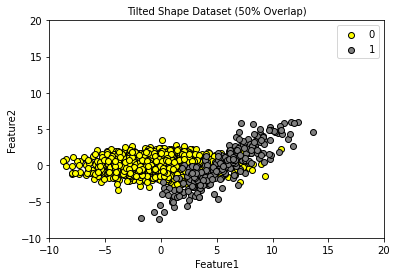

In [4]:
ImbalancePlot(df=df, x1='Feature1', x2='Feature2', y='Results',MinLimit= GraphMinLimit, MaxLimit= GraphMaxLimit, title='Tilted Shape Dataset (50% Overlap)')

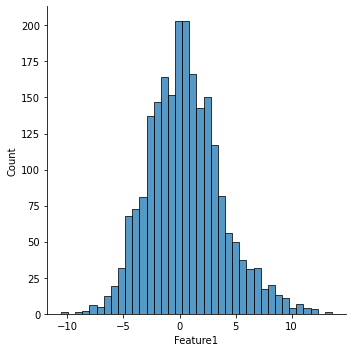

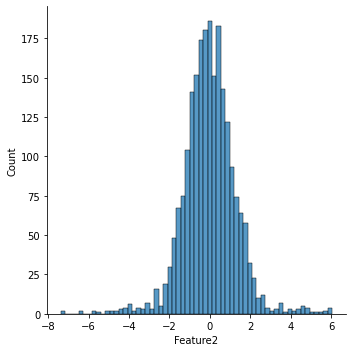

In [5]:
sns.displot(df, x="Feature1")
sns.displot(df, x="Feature2")

<AxesSubplot:xlabel='Feature2'>

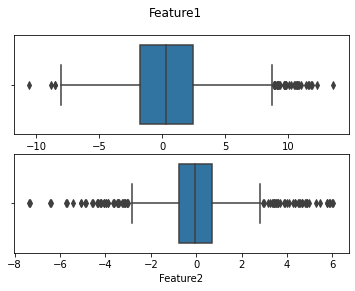

In [6]:
fig, ax = plt.subplots(2)
fig.suptitle('Feature1')
sns.boxplot(x=df["Feature1"], ax = ax[0])
sns.boxplot(x=df["Feature2"], ax = ax[1])

In [7]:
outliers = find_outliers_IQR(df['Feature1'])
print('first')
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('mean outlier value: '+ str(outliers.mean()))
print('min outlier value: '+ str(outliers.min()))
outliers = find_outliers_IQR(df['Feature2'])
print('second')
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('mean outlier value: '+ str(outliers.mean()))
print('min outlier value: '+ str(outliers.min()))

first
number of outliers: 42
max outlier value: 13.603443135911576
mean outlier value: 8.32434244188955
min outlier value: -10.578602093663342
second
number of outliers: 82
max outlier value: 6.039897948345073
mean outlier value: -0.0681972110601962
min outlier value: -7.366933362634143


In [8]:
X = df.drop(columns = ['Results'], axis = 1)
y = df['Results']

# Scaling the dataset
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df= pd.DataFrame(X,columns = ['Feature1','Feature2'])

#Split dataset in train an test 80-20.
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       403
         1.0       0.72      0.60      0.65        47

    accuracy                           0.93       450
   macro avg       0.84      0.78      0.81       450
weighted avg       0.93      0.93      0.93       450



(0.9333333333333333,
 array([[392,  11],
        [ 19,  28]], dtype=int64))

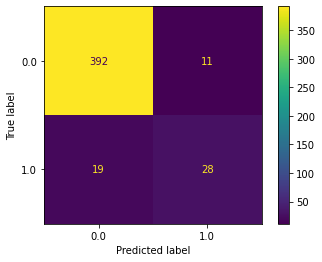

In [9]:
Train_model(X_train,y_train,X_test,y_test,GaussianNB())

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       403
         1.0       0.77      0.64      0.70        47

    accuracy                           0.94       450
   macro avg       0.86      0.81      0.83       450
weighted avg       0.94      0.94      0.94       450



(0.9422222222222222,
 array([[394,   9],
        [ 17,  30]], dtype=int64))

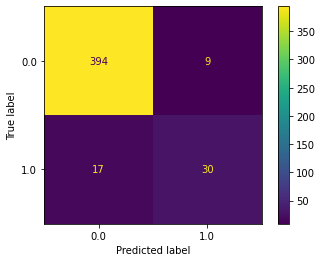

In [10]:
Train_model(X_train,y_train,X_test,y_test,svm.SVC(kernel='rbf'))

In [11]:
#SVM with grid search

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       403
         1.0       0.72      0.70      0.71        47

    accuracy                           0.94       450
   macro avg       0.84      0.83      0.84       450
weighted avg       0.94      0.94      0.94       450



(0.94,
 array([[390,  13],
        [ 14,  33]], dtype=int64))

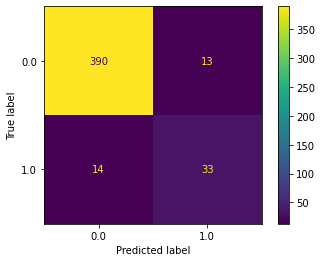

In [12]:
Train_model(X_train,y_train,X_test,y_test,MLPClassifier())

## OverSampling

### SMOTE

In [13]:
SMT = SMOTE()
X_SMOTE_oversample, y_SMOTE_oversample = SMT.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_SMOTE_oversample))

Resampled dataset shape Counter({0.0: 1597, 1.0: 1597})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


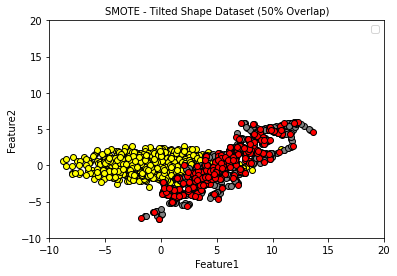

In [14]:
X_copy=X.copy()
y_copy=y.copy()
y_SMOTE_oversample=get_Graph_Values(X_copy,y_copy,X_SMOTE_oversample,y_SMOTE_oversample)

X_SMOTE_oversample=pd.DataFrame(X_SMOTE_oversample, columns=['Feature1','Feature2'])
y_SMOTE_oversample=pd.DataFrame(y_SMOTE_oversample, columns=['Results'])
Data_SMOTE = pd.concat([X_SMOTE_oversample, y_SMOTE_oversample],axis=1)

Genrated_points_Proposed_Algo(df=Data_SMOTE, x1='Feature1', x2='Feature2', y='Results',MinLimit= GraphMinLimit, MaxLimit= GraphMaxLimit, title='SMOTE - Tilted Shape Dataset (50% Overlap)')

In [15]:
y_SMOTE_oversample.value_counts()

Results
0.0        1597
1.0        1394
2.0         203
dtype: int64

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94       403
         1.0       0.53      0.85      0.65        47

    accuracy                           0.90       450
   macro avg       0.75      0.88      0.80       450
weighted avg       0.93      0.90      0.91       450



(0.9044444444444445,
 array([[367,  36],
        [  7,  40]], dtype=int64))

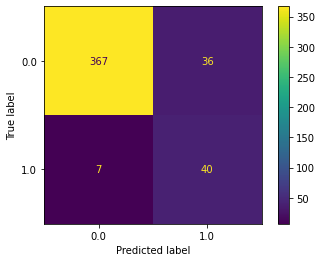

In [16]:
Train_model(X_SMOTE_oversample,y_SMOTE_oversample,X_test,y_test,GaussianNB())

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       403
         1.0       0.51      0.89      0.65        47

    accuracy                           0.90       450
   macro avg       0.75      0.90      0.80       450
weighted avg       0.94      0.90      0.91       450



(0.9,
 array([[363,  40],
        [  5,  42]], dtype=int64))

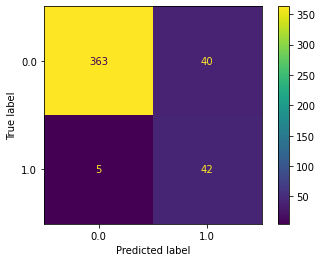

In [17]:
Train_model(X_SMOTE_oversample,y_SMOTE_oversample,X_test,y_test,svm.SVC(kernel='rbf'))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       403
         1.0       0.52      0.89      0.66        47

    accuracy                           0.90       450
   macro avg       0.75      0.90      0.80       450
weighted avg       0.94      0.90      0.91       450



(0.9022222222222223,
 array([[364,  39],
        [  5,  42]], dtype=int64))

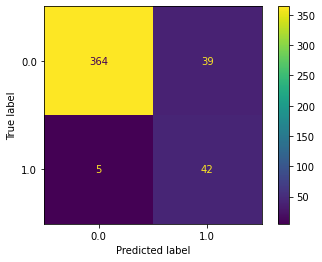

In [18]:
Train_model(X_SMOTE_oversample,y_SMOTE_oversample,X_test,y_test,MLPClassifier())

### ADASYN

In [19]:
ADA = ADASYN()
X_ADA_oversampling, y_ADA_oversampling = ADA.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_ADA_oversampling))

Resampled dataset shape Counter({0.0: 1597, 1.0: 1585})


In [20]:
y_ADA_oversampling.value_counts()

0.0    1597
1.0    1585
Name: Results, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


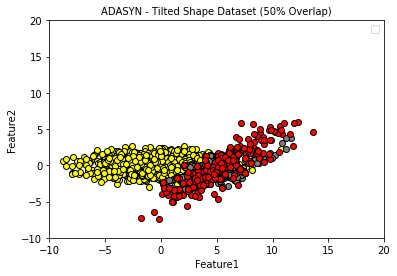

In [21]:
# ADASYN Oversample Graph
X_copy1=X.copy()
y_copy1=y.copy()
y_ADA_oversampl = y_ADA_oversampling.copy()
y_ADA_oversampl=get_Graph_Values(X_copy1,y_copy1,X_ADA_oversampling,y_ADA_oversampl)

X_ADA_oversampling=pd.DataFrame(X_ADA_oversampling, columns=['Feature1','Feature2'])
y_ADA_oversampl=pd.DataFrame(y_ADA_oversampl, columns=['Results'])
DF_ADA = pd.concat([X_ADA_oversampling, y_ADA_oversampl],axis=1)

#ClassImbalancePlot_Proposed_Algo(df=df_smote, x1='Feature1', x2='Feature2', y='Results',MinLimit=-10,MaxLimit=15,colorChange='Yes')
Genrated_points_Proposed_Algo(df=DF_ADA, x1='Feature1', x2='Feature2', y='Results',MinLimit= GraphMinLimit, MaxLimit= GraphMaxLimit, title='ADASYN - Tilted Shape Dataset (50% Overlap)')

              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90       403
         1.0       0.39      0.94      0.55        47

    accuracy                           0.84       450
   macro avg       0.69      0.88      0.72       450
weighted avg       0.93      0.84      0.86       450



(0.8377777777777777,
 array([[333,  70],
        [  3,  44]], dtype=int64))

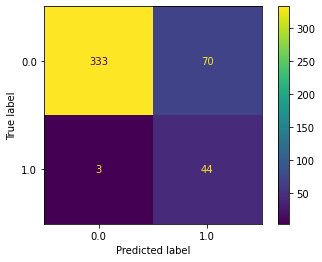

In [22]:
Train_model(X_ADA_oversampling,y_ADA_oversampling,X_test,y_test,GaussianNB())

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92       403
         1.0       0.43      0.94      0.59        47

    accuracy                           0.86       450
   macro avg       0.71      0.90      0.75       450
weighted avg       0.93      0.86      0.88       450



(0.8644444444444445,
 array([[345,  58],
        [  3,  44]], dtype=int64))

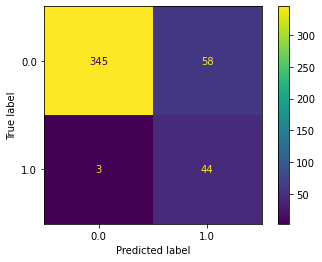

In [23]:
Train_model(X_ADA_oversampling,y_ADA_oversampling,X_test,y_test,svm.SVC(kernel='rbf'))

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93       403
         1.0       0.46      0.91      0.61        47

    accuracy                           0.88       450
   macro avg       0.72      0.89      0.77       450
weighted avg       0.93      0.88      0.89       450



(0.8777777777777778,
 array([[352,  51],
        [  4,  43]], dtype=int64))

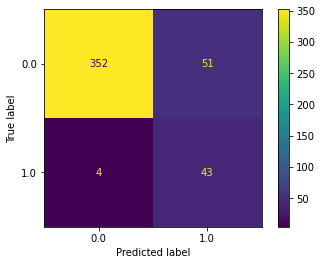

In [24]:
Train_model(X_ADA_oversampling,y_ADA_oversampling,X_test,y_test,MLPClassifier())

{'C': 1, 'gamma': 500}
Training Accuracy = 0.8955555555555555
SVC(C=1, gamma=500)


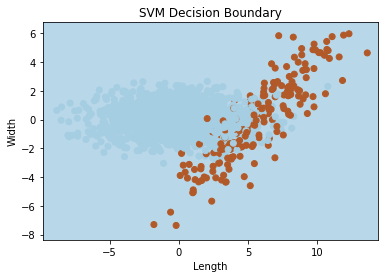

In [25]:
mainclass = MainClass
params = mainclass.svc_param_selection(X_train,y_train)
#params = {'C': 1, 'gamma':50}

print(params)
model_svm = mainclass.generate_clf(params['C'], params['gamma'],  X_train, y_train, X_test,y_test)
print(model_svm)
plt.figure(2)
mainclass.plot_svm_decision_boundry(np.array(X_train), y_train, model_svm)

In [26]:
by_class = df.groupby(df.Results)
only1 = by_class.get_group(1)
meanx = statistics.mean(np.array(only1.Feature1))
meany = statistics.mean(np.array(only1.Feature2))
print(meanx,meany)
unique, counts = np.unique(y, return_counts=True)
counts_in_train = dict(zip(unique, counts))
print('Before over ', counts_in_train)
num_for_train = counts_in_train[0.0] - counts_in_train[1.0]
print(num_for_train)
selected_points = []
count = 0

5.487519766747123 -0.04703955500991979
Before over  {0.0: 2000, 1.0: 250}
1750


In [27]:
while count != num_for_train:
    new_data = np.c_[
    np.r_[
    np.random.multivariate_normal([meanx, meany], MinorCov1, 1000)]
    ]
    new_pred = model_svm.decision_function(new_data)  # Get Which side of hyperplane new point lies
    new_pred_trans = new_pred.reshape((-1, 1))
    new_data = np.c_[new_data, new_pred_trans]
    for i in new_data:
        if count < num_for_train:
            if i[2] > 0:
                selected_points.append(i)
                count = count + 1
                i[2]=2
            else:
                continue
        else:
            break

In [28]:
selected_points = np.array(selected_points)
selected_transp = np.array((selected_points[:, 0], selected_points[:, 1])).T
X_train_new = np.concatenate((np.array(X), selected_transp))
y_train_new = np.concatenate((np.array(y), selected_points[:, 2]))
unique, counts = np.unique(y_train_new, return_counts=True)
counts_in_train = dict(zip(unique, counts))
print('After over ', counts_in_train)
print(len(X_train_new))

After over  {0.0: 2000, 1.0: 250, 2.0: 1750}
4000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


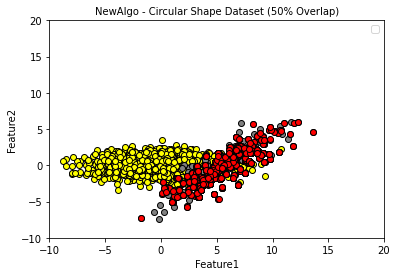

In [29]:
dataframeX=pd.DataFrame(X_train_new, columns=['Feature1','Feature2'])
dataframe=pd.DataFrame(y_train_new, columns=['Results'])
DF_NewAlgo = pd.concat([dataframe, dataframeX],axis=1)

Genrated_points_Proposed_Algo(df=DF_NewAlgo, x1='Feature1', x2='Feature2', y='Results',MinLimit= GraphMinLimit, MaxLimit= GraphMaxLimit, title='NewAlgo - Circular Shape Dataset (50% Overlap)')

sns.scatterplot(data=DF_NewAlgo, x="Feature1", y="Feature2")

In [30]:
df_test = DF_NewAlgo.loc[lambda DF_NewAlgo: DF_NewAlgo['Results'] == 2]

In [31]:
y_train_new = [1.0 if item == 2.0 else item for item in y_train_new]

Apply models

              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92       403
         1.0       0.44      0.87      0.59        47

    accuracy                           0.87       450
   macro avg       0.71      0.87      0.75       450
weighted avg       0.93      0.87      0.89       450



(0.8711111111111111,
 array([[351,  52],
        [  6,  41]], dtype=int64))

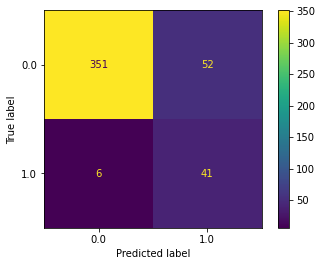

In [32]:
Train_model(X_train_new,y_train_new,X_test,y_test,GaussianNB())

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       403
         1.0       0.52      0.89      0.66        47

    accuracy                           0.90       450
   macro avg       0.75      0.90      0.80       450
weighted avg       0.94      0.90      0.91       450



(0.9022222222222223,
 array([[364,  39],
        [  5,  42]], dtype=int64))

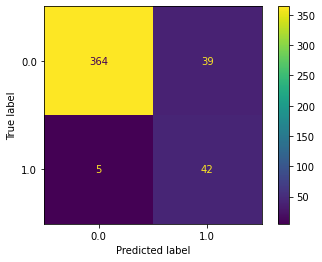

In [33]:
Train_model(X_train_new,y_train_new,X_test,y_test,svm.SVC(kernel='rbf'))

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.94       403
         1.0       0.53      0.89      0.66        47

    accuracy                           0.90       450
   macro avg       0.76      0.90      0.80       450
weighted avg       0.94      0.90      0.91       450



(0.9044444444444445,
 array([[365,  38],
        [  5,  42]], dtype=int64))

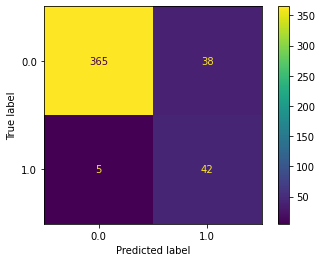

In [34]:
Train_model(X_train_new,y_train_new,X_test,y_test,MLPClassifier())